In [521]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
#import seaborn as sns


In [522]:
dataset = pd.read_csv("dataset.csv")
dataset.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [523]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [524]:
dataset['Churn?'] = np.where(dataset['Churn?'] == 'True.',1, 0)
dataset['Int\'l Plan'] = np.where(dataset['Int\'l Plan'] == 'yes',1, 0)
dataset['VMail Plan'] = np.where(dataset['VMail Plan'] == 'yes',1, 0)
dataset['Phone'] = dataset['Phone'].apply(lambda phone: "".join(phone.split("-")))

<AxesSubplot:>

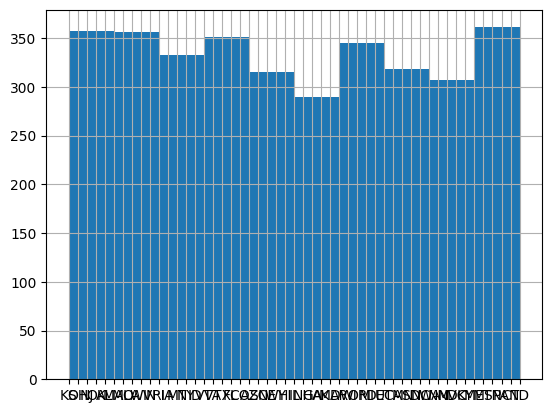

In [525]:
dataset['State'].hist()

<AxesSubplot:>

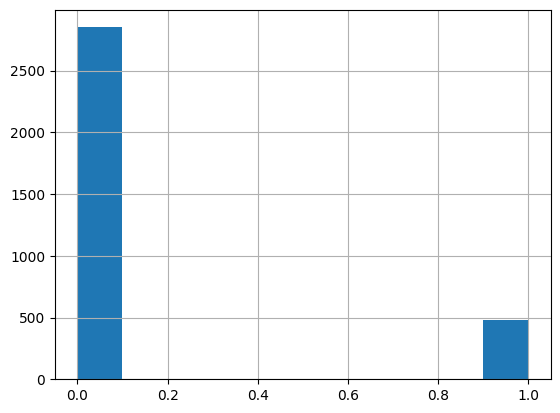

In [526]:
dataset['Churn?'].hist()

In [527]:
features = dataset.iloc[:,:-1]
features

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,415,3824657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,3717191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,3581921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,3759999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,3306626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,4144276,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,68,415,3703271,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,28,510,3288230,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,184,510,3646381,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [528]:
labels = dataset.iloc[:,-1]
labels

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn?, Length: 3333, dtype: int32

In [529]:
features_dummies = pd.get_dummies(features,columns=['State'] ,drop_first=True)
features_dummies

,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,3824657,0,1,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,3717191,0,1,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,3581921,0,0,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,3759999,1,0,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,3306626,1,0,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,0,1,36,156.2,77,26.55,215.5,...,0,0,0,0,0,0,0,0,0,0
3329,68,415,3703271,0,0,0,231.1,57,39.29,153.4,...,0,0,0,0,0,0,0,0,1,0
3330,28,510,3288230,0,0,0,180.8,109,30.74,288.8,...,0,0,0,0,0,0,0,0,0,0
3331,184,510,3646381,1,0,0,213.8,105,36.35,159.6,...,0,0,0,0,0,0,0,0,0,0


In [530]:
features_train, features_test, labels_train, labels_test = skms.train_test_split(features_dummies, labels, test_size=0.2)

In [531]:
LR = sklm.SGDClassifier(random_state=0, learning_rate='constant',eta0=0.1, max_iter=100)
LR.fit(features_train, labels_train)

SGDClassifier(eta0=0.1, learning_rate='constant', max_iter=100, random_state=0)

In [532]:
prediction = LR.predict(features_test)

In [533]:
from sklearn.metrics import accuracy_score
#0.8515742128935532
#0.8515742128935532
accuracy_score(labels_test, prediction), LR.learning_rate

(0.856071964017991, 'constant')